# Atlanta Crime - KMeans

## Description

In this part of the project, we will use K-Means clustering to calculate distance from each cluster for each data point. Then, we will use these distances as additional features for our supervised model.

## Import Libraries

In [1]:
import sklearn as sk
from sklearn import cluster
from sklearn import neighbors
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

## Date & Time Functions

In [2]:
def print_month(row):
    cur_date = row['Occur Date']
    year, month, day = (int(x) for x in cur_date.split('/'))    
    month = int(month)
    return month

def day_of_month(row):
    cur_date = row['Occur Date']
    year, month, day = (int(x) for x in cur_date.split('/'))    
    day = int(day)
    return day

def year(row):
    cur_date = row['Occur Date']
    year, month, day = (int(x) for x in cur_date.split('/'))    
    year = int(year)
    return year

## Load Data

In [9]:
### 2009-2018 clean
data = pd.read_csv("data/Supervised_Algs/cobra-clean2009.csv") #, sep=',', header=0, engine='python', usecols = lambda column : column in ["Latitude", "Longitude"])
#Other datasets
#data = pd.read_csv("cobra-clean.csv", sep=',', header=0, engine='python', usecols = lambda column : column in ["Latitude", "Longitude"])

## Data Manipulation

In [10]:
#Extract date features
data['Year'] = data.apply(lambda row: year(row), axis=1)
data['Month'] = data.apply(lambda row: print_month(row), axis=1)
data['Day of Month'] = data.apply(lambda row: day_of_month(row), axis=1)

#Drop unneeded features
data = data.drop(['Occur Date','Beat','Location','UCR #','Neighborhood','Shift Occurrence','UCR Literal','NPU'],axis=1)

X = data.to_numpy()
# Create categories to save for labeling after normalization 
X_cat = X[:,4]
#print(X_cat)

head_tail = data.iloc[np.r_[0:10, -10:0]]
head_tail

,Occur Time,Longitude,Latitude,Day of Week,Crime Category,Year,Month,Day of Month
0,1145,-84.49328,33.68845,3,4,1,1,9
1,1330,-84.39201,33.75320,3,4,1,1,9
2,1450,-84.36212,33.84676,3,4,1,1,9
3,1600,-84.49773,33.68677,3,4,1,1,9
4,1645,-84.34875,33.75786,3,4,1,1,9
5,1740,-84.45385,33.70827,3,4,1,1,9
6,1627,-84.36212,33.84676,3,4,1,1,9
7,815,-84.48742,33.68841,3,4,1,1,9
8,100,-84.43612,33.71464,3,4,1,1,9
9,130,-84.34595,33.76675,3,4,1,1,9


In [8]:
print(X[:,4])

[4. 4. 4. ... 4. 3. 3.]


## Normalize Data

In [12]:
X = sk.preprocessing.StandardScaler().fit_transform(X)

In [33]:
X = sk.preprocessing.StandardScaler().fit_transform(X)
k = 5
km = sk.cluster.KMeans(n_clusters = k, init='random',n_init=1,max_iter=300,tol=1e-04,random_state=0)
km.fit_predict(X)
cent_dist = km.transform(X)
new_data = np.append(X, cent_dist, 1)
print(new_data)

[[-0.3241332  -2.348316   -1.6107065  ...  3.89242432  4.1927677
   3.82322197]
 [-0.04718735  0.2016673  -0.13277916 ...  2.11487911  3.34807239
   3.54762707]
 [ 0.1324532   0.95429889  2.00274025 ...  2.80509173  4.22888586
   4.6169649 ]
 ...
 [ 1.26269168 -1.91169399  1.19221979 ...  4.93996711  5.15083855
   4.34089772]
 [-1.28970117 -0.2334439  -0.83876051 ...  4.71445031  3.46539923
   3.78381946]
 [-0.09209749  0.64030371  1.92079802 ...  4.10487318  3.85125222
   4.04122897]]


In [34]:
print(cent_dist)

[[4.64945542 4.92603094 3.89242432 4.1927677  3.82322197]
 [3.26341651 3.62473279 2.11487911 3.34807239 3.54762707]
 [3.71797698 3.92761554 2.80509173 4.22888586 4.6169649 ]
 ...
 [4.24428991 3.75802578 4.93996711 5.15083855 4.34089772]
 [3.99745754 3.69106996 4.71445031 3.46539923 3.78381946]
 [3.52901828 2.79375948 4.10487318 3.85125222 4.04122897]]


## Compute KMeans

In [16]:
print(X[0])
print()
print(X[:,0])

[-0.3241332  -2.348316   -1.6107065   0.0039706   0.81198297 -1.67792917
 -1.666418   -1.44844238]

[-0.3241332  -0.04718735  0.1324532  ...  1.26269168 -1.28970117
 -0.09209749]


Number of Clusters =  4
--------------------------------------------------------------
Cluster Centers:  [[ 0.09584632  0.33721694  0.1896191  -0.03315521  0.38780929 -0.06044143
   0.94643617 -0.63060549]
 [ 0.0724007   0.23210658  0.41556218  0.02138454  0.54074006  0.06442081
  -0.03376603  1.13145844]
 [ 0.00599379  0.27478407  0.08694448 -0.0364766   0.33952814  0.02083433
  -0.97298807 -0.65566675]
 [-0.15028629 -0.71466764 -0.61191093  0.03686063 -1.09579062 -0.02770868
   0.05449098 -0.00419704]]
Labels:  [2 2 2 ... 1 3 1]
Unique Labels:  [0 1 2 3]
--------------------------------------------------------------


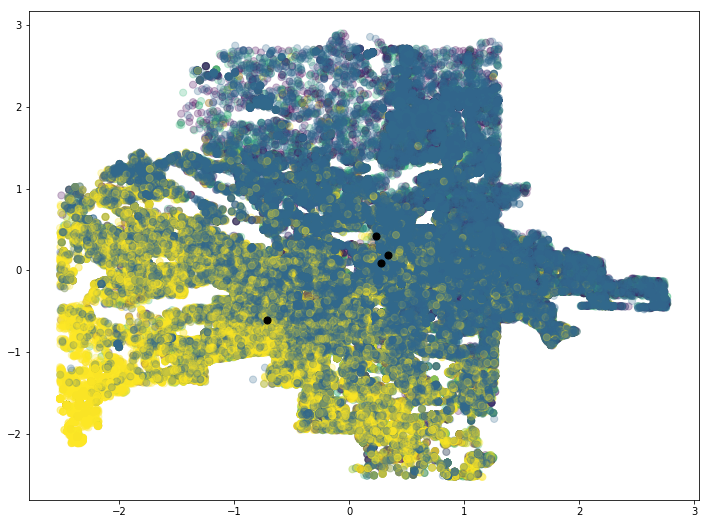

In [17]:
# After Normalization 

k_values = np.array([4])
for k in k_values:
    km = sk.cluster.KMeans(n_clusters = k, init='random',n_init=1,max_iter=300,tol=1e-04,random_state=0)
    y_km = km.fit_predict(X)

    centers = km.cluster_centers_
    labels = km.labels_
    inertia = km.inertia_
    print('Number of Clusters = ',k)
    print('--------------------------------------------------------------')
    print('Cluster Centers: ',centers)
    print('Labels: ',labels)
    print('Unique Labels: ',np.unique(labels))
    
    # Plot Sizing 
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    
    plt.scatter(X[:, 1], X[:, 2], c=y_km, s=50, cmap='viridis', alpha=0.25)
    #plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50,c='lightgreen',edgecolor='black', label='cluster 1', alpha=0.25)
    
    plt.scatter(centers[:, 1], centers[:, 2], c='black', s=50, alpha=1);
    print('--------------------------------------------------------------')

ValueError: 'c' argument has 289631 elements, which is not acceptable for use with 'x' with size 66260, 'y' with size 66260.

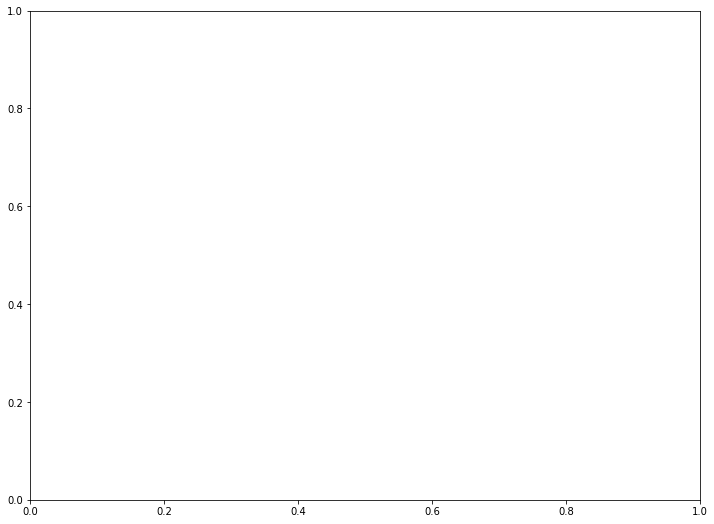

In [14]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50,c=X_cat, cmap='viridis',edgecolor='black', label='cluster 1', alpha=0.25)

In [26]:
print(X.shape)

(289631, 8)


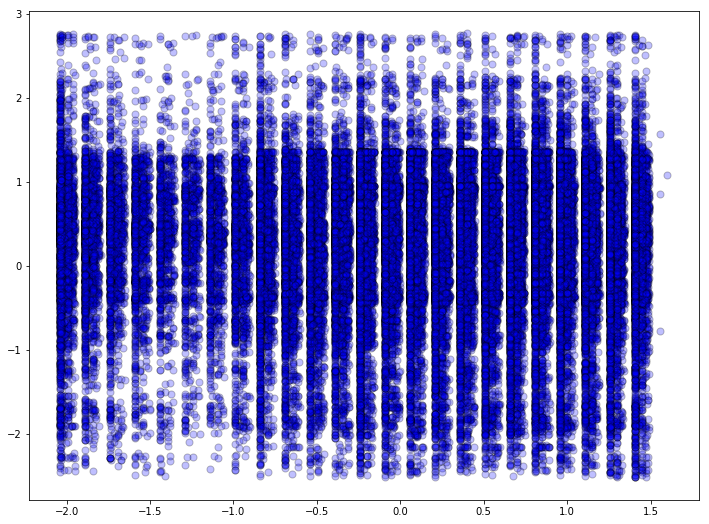

In [23]:
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50,c='blue',edgecolor='black', label='cluster 1', alpha=0.25)

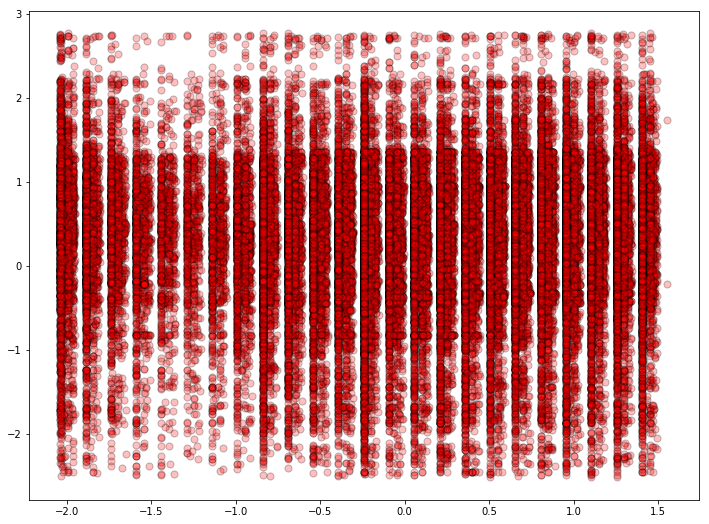

In [24]:
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50,c='red',edgecolor='black', label='cluster 1', alpha=0.25)

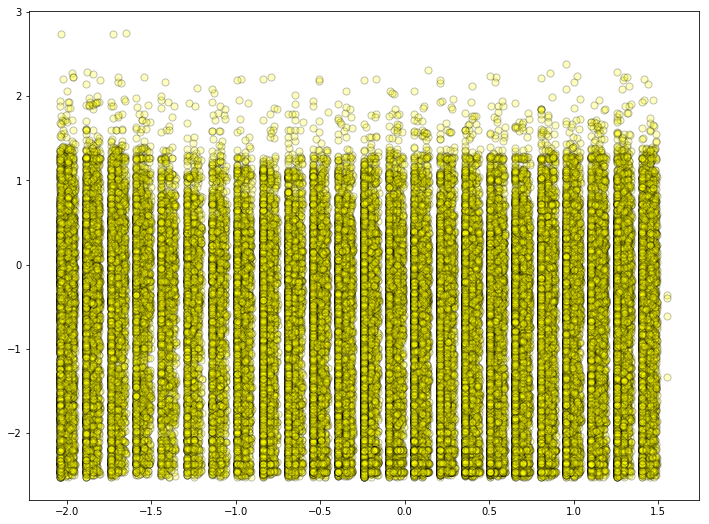

In [25]:
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s=50,c='yellow',edgecolor='black', label='cluster 1', alpha=0.25)

Number of Clusters =  4
--------------------------------------------------------------
Cluster Centers:  [[2107.50258148  -84.39815838   33.7600017     3.00216269    3.38120836
     6.68706012   15.75162827   13.16212669]
 [1620.53528067  -84.39994468   33.76182889    2.97733976    3.49964363
     6.68606223   15.75348997   13.19261207]
 [1040.00654159  -84.40148615   33.75781725    2.80706692    3.45475922
     6.67997498   15.62606629   13.06411507]
 [ 222.14118645  -84.40079707   33.75463711    3.30677678    3.22623779
     6.6574971    15.68212866   13.12102583]]
Labels:  [2 2 1 ... 0 3 2]
Unique Labels:  [0 1 2 3]
--------------------------------------------------------------


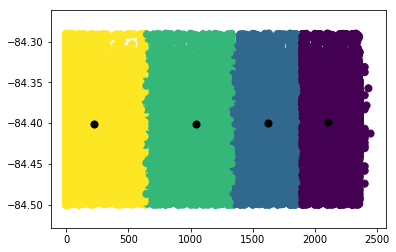

In [9]:
# Before Normalization 

k_values = np.array([4])
for k in k_values:
    km = sk.cluster.KMeans(n_clusters = k, init='random',n_init=1,max_iter=300,tol=1e-04,random_state=0)
    y_km = km.fit_predict(X)

    centers = km.cluster_centers_
    labels = km.labels_
    inertia = km.inertia_
    print('Number of Clusters = ',k)
    print('--------------------------------------------------------------')
    print('Cluster Centers: ',centers)
    print('Labels: ',labels)
    print('Unique Labels: ',np.unique(labels))
    plt.scatter(X[:, 0], X[:, 1], c=y_km, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=1);
    print('--------------------------------------------------------------')

## Calculate KMeans Distances

In [10]:
def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
        distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
        return distances
clusters=km.fit_predict(data)
centroids = km.cluster_centers_

distances = []
for i, (cx, cy) in enumerate(centroids):
    mean_distance = k_mean_distance(data, cx, cy, i, clusters)
    distances.append(mean_distance)

print(distances)

ValueError: too many values to unpack (expected 2)

## K Means Elbow Method

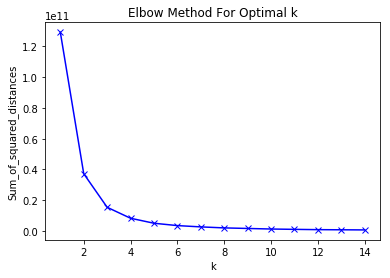

In [8]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = sk.cluster.KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## PCA >> KMeans

#### Redundant Things for Kernel Restart

In [ ]:
import sklearn as sk
from sklearn import cluster
from sklearn import neighbors
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

In [18]:
from sklearn.decomposition import PCA

In [21]:
def print_month(row):
    cur_date = row['Occur Date']
    year, month, day = (int(x) for x in cur_date.split('/'))    
    month = int(month)
    return month

def day_of_month(row):
    cur_date = row['Occur Date']
    year, month, day = (int(x) for x in cur_date.split('/'))    
    day = int(day)
    return day

def year(row):
    cur_date = row['Occur Date']
    year, month, day = (int(x) for x in cur_date.split('/'))    
    year = int(year)
    return year

#### Reading in Data

In [23]:
data = pd.read_csv("data/Supervised_Algs/cobra-clean2009.csv") #, sep=',', header=0, engine='python', usecols = lambda column : column in ["Latitude", "Longitude"])

In [24]:
#Extract date features
data['Year'] = data.apply(lambda row: year(row), axis=1)
data['Month'] = data.apply(lambda row: print_month(row), axis=1)
data['Day of Month'] = data.apply(lambda row: day_of_month(row), axis=1)

#Drop unneeded features
data = data.drop(['Occur Date','Beat','Location','UCR #','Neighborhood','Shift Occurrence','UCR Literal','NPU'],axis=1)
#X = data.to_numpy()

# Create categories to save for labeling after normalization 
#X_cat = X[:,4]
X_cat = data['Crime Category']
#print(X_cat)

head_tail = data.iloc[np.r_[0:10, -10:0]]
head_tail

0         4
1         4
2         4
3         4
4         4
5         4
6         4
7         4
8         4
9         4
10        4
11        4
12        4
13        4
14        4
15        4
16        4
17        2
18        2
19        2
20        4
21        4
22        4
23        3
24        3
25        3
26        3
27        3
28        3
29        3
         ..
289601    3
289602    3
289603    2
289604    2
289605    2
289606    2
289607    2
289608    2
289609    2
289610    2
289611    2
289612    2
289613    3
289614    3
289615    3
289616    3
289617    3
289618    3
289619    3
289620    4
289621    4
289622    4
289623    4
289624    4
289625    4
289626    4
289627    4
289628    4
289629    3
289630    3
Name: Crime Category, Length: 289631, dtype: int64


,Occur Time,Longitude,Latitude,Day of Week,Crime Category,Year,Month,Day of Month
0,1145,-84.49328,33.68845,3,4,1,1,9
1,1330,-84.39201,33.75320,3,4,1,1,9
2,1450,-84.36212,33.84676,3,4,1,1,9
3,1600,-84.49773,33.68677,3,4,1,1,9
4,1645,-84.34875,33.75786,3,4,1,1,9
5,1740,-84.45385,33.70827,3,4,1,1,9
6,1627,-84.36212,33.84676,3,4,1,1,9
7,815,-84.48742,33.68841,3,4,1,1,9
8,100,-84.43612,33.71464,3,4,1,1,9
9,130,-84.34595,33.76675,3,4,1,1,9


#### PCA

In [27]:
features = ['Occur Time', 'Longitude', 'Latitude', 'Day of Week', 'Year', 'Month', 'Day of Month']

x = data.loc[:, features].values
y = data.loc[:,['Crime Category']].values

x = sk.preprocessing.StandardScaler().fit_transform(x)

In [28]:
pca = PCA(n_components=2)

principalComp = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComp, columns = ['principal component 1', 'principal component 2'])

In [30]:
finalDf = pd.concat([principalDf, data[['Crime Category']]], axis = 1)

In [32]:
print(finalDf)

        principal component 1  principal component 2  Crime Category
0                    3.085780              -0.046616               4
1                    0.341611               0.153870               4
2                   -1.661205               0.278746               4
3                    3.015973              -0.435333               4
4                   -0.557312               0.008037               4
5                    1.907600              -0.408325               4
6                   -1.726979               0.132836               4
7                    3.113035               0.239761               4
8                    2.126580               0.997428               4
9                   -0.179740               1.278092               4
10                   0.095344               0.569549               4
11                   0.190588               0.106359               4
12                  -1.695478               0.103658               4
13                  -0.069290     

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

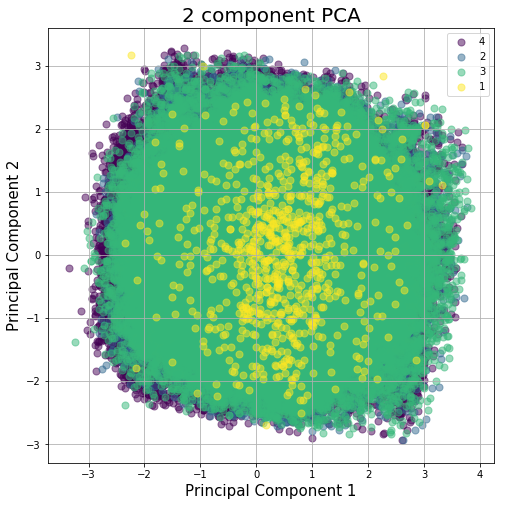

In [34]:
import random
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#targets = [4, 3, 2, 1]
targets = data['Crime Category'].unique()
colors = cm.get_cmap('viridis', len(targets))
#print(type)
#colors = []
#r = random.random
#for i in range(0,len(targets)):
#    rgb = (r(),r(),r())
#    colors.append(rgb)
#print(len(targets))
#print(colors.colors)
#colors = ['r', 'g', 'b']


for target, color in zip(targets,colors.colors):
    #print(color[:3])
    #print(len(color))
    indicesToKeep = finalDf['Crime Category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
               , alpha = 0.5)
    #print(indicesToKeep)
ax.legend(targets)
ax.grid()

#### KMeans

In [37]:
print(centers)

[[-1.25010716  0.46139796]
 [-0.45271451 -0.91112257]
 [ 0.48016146  1.03617829]
 [ 1.23675604 -0.55999127]]


In [42]:
print(principalDf['principal component 1'])

0         3.085780
1         0.341611
2        -1.661205
3         3.015973
4        -0.557312
5         1.907600
6        -1.726979
7         3.113035
8         2.126580
9        -0.179740
10        0.095344
11        0.190588
12       -1.695478
13       -0.069290
14        2.867331
15        1.449376
16       -0.220092
17        1.159684
18        0.265615
19        1.024631
20        1.627656
21       -1.437603
22       -0.359711
23        1.295808
24        1.231947
25       -0.229317
26        1.245365
27        0.629791
28        3.720444
29        0.244413
            ...   
289601   -0.580718
289602    0.606025
289603    0.523193
289604   -0.163881
289605   -1.244456
289606   -2.396319
289607    0.195901
289608   -0.836759
289609   -0.605762
289610    0.603880
289611    0.581760
289612    0.578503
289613    1.823097
289614   -2.039039
289615   -2.205053
289616   -2.142947
289617   -2.186923
289618   -2.546823
289619    0.190998
289620   -0.457241
289621   -0.815648
289622   -0.

Number of Clusters =  5
--------------------------------------------------------------
Cluster Centers:  [[-1.51614892  0.26944276]
 [-0.07316461  0.1933231 ]
 [ 0.49838947  1.43555885]
 [ 1.40062653 -0.42087804]
 [-0.31938373 -1.19225541]]
Labels:  [3 1 0 ... 4 3 0]
Unique Labels:  [0 1 2 3 4]
Inertia ?:  191466.49924708827


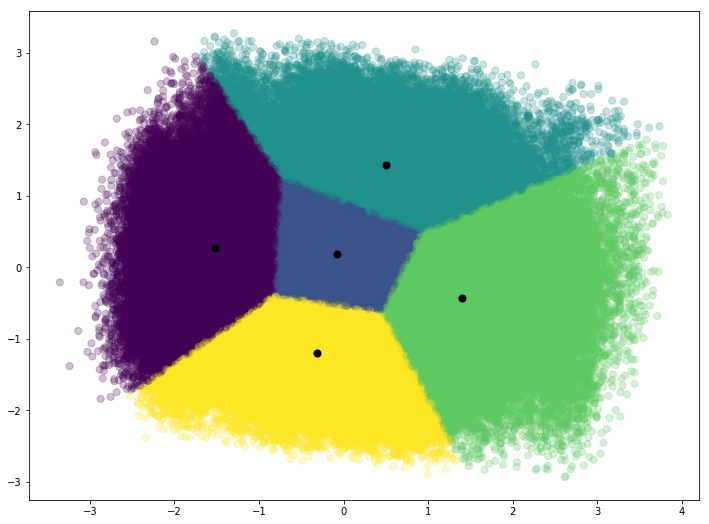

In [52]:
principalDf = principalDf.to_numpy()

km = sk.cluster.KMeans(n_clusters = 5, init='random',n_init=1,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(principalDf)

centers = km.cluster_centers_
labels = km.labels_
inertia = km.inertia_
print('Number of Clusters = ',5)
print('--------------------------------------------------------------')
print('Cluster Centers: ',centers)
print('Labels: ',labels)
print('Unique Labels: ',np.unique(labels))
print('Inertia ?: ',inertia)
# Plot Sizing 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
    
plt.scatter(principalDf[:,0], principalDf[:,1], c=y_km, s=50, cmap='viridis', alpha=0.25)
    #plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50,c='lightgreen',edgecolor='black', label='cluster 1', alpha=0.25)
    
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=1);

In [46]:
principalDf = principalDf.to_numpy()

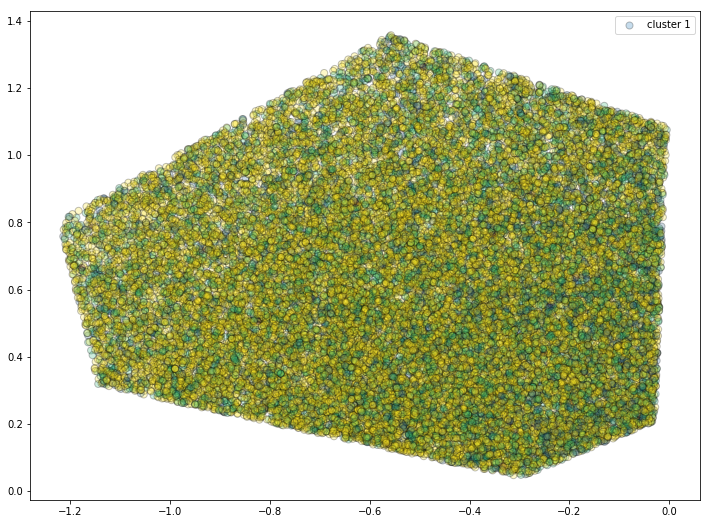

In [50]:
plt.scatter(principalDf[y_km == 1, 0], principalDf[y_km == 1, 1], s=50,c=X_cat[y_km == 1],cmap='viridis',edgecolor='black', label='cluster 1', alpha=0.25)
plt.legend()

#### Elbow

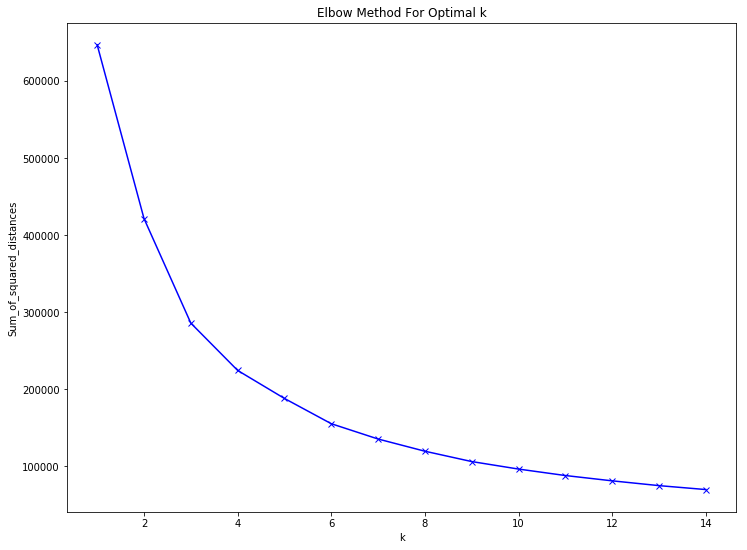

In [38]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = sk.cluster.KMeans(n_clusters=k)
    km = km.fit(principalDf)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()